# Bin Scatter

This notebook illustrates how to do a bin scatter.

## Load Packages and Extra Functions

The key function `BinScatter()` is from the (local) `FinEcmt_OLS` module.

In [1]:
MyModulePath = joinpath(pwd(),"jlFiles")
!in(MyModulePath,LOAD_PATH) && push!(LOAD_PATH,MyModulePath);

In [2]:
using FinEcmt_OLS, DelimitedFiles, Statistics, Plots

## Loading Data

In [3]:
x  = readdlm("Data/FFmFactorsPs.csv",',',skipstart=1)
(Rme,SMB,HML,Rf) = (x[:,2],x[:,3],x[:,4],x[:,5])

x  = readdlm("Data/FF25Ps.csv",',') #no header line
R  = x[:,2:end]                     #returns for 25 FF portfolios
Re = R .- Rf                        #excess returns for the 25 FF portfolios

T = size(Re,1)                      #number of observations

388

In [4]:
y  = Re[:,6]                #to the notation used in comment, use asset 6
x₁ = [Rme SMB]              #1st set of regressors (2), no intercept
x₂ = HML;                   #2nd set of regressors, which we focus on

## A Function for a Bin Scatter

Consider the linear regressions

$
y_{it}=x_{t}^{\prime}\beta_i+u_{it}, 
$

where $i=1,2,..,n$ indicates $n$ different dependent variables. The $K$ regressors are the *same* across the $n$ regressions. (This is often called SURE, Seemingly Unrelated Regression Equations.)


In [5]:
@doc2 BinScatter

```
BinScatter(y,x₁,x₂,L=[],U=[],N=20,critval=1.645)
```

Do a regression `y = x₁'γ + d'β + u`, where `d` is an N-vector indicating membership in a certain `x₂` bin. Plotting `β` against those bins is a binscatter plot.

# Input:

  * `y::Vector`:         dependent variable
  * `x₁::VecOrMat`:      control variables
  * `x₂::Vector`:        main regressor of interest
  * `L::Vector`:         lower bin boundaries, if [] then quantiles (see N)
  * `U::Vector`:         upper bin boundaries, if [] then quantiles (see N)
  * `N::Vector`:         number of quantiles, giving N+1 bins. Used if `L=U=[]`
  * `critval::Vector`:   for calculation of confidence band

# Output

  * `β::Vector`:         N-vector of coeffs on the bin (x₂) dummies
  * `stdβ::Vector`:      N-vector of std of β
  * `fnO::NamedTuple`:   with (LU,confBand)


In [6]:
#using CodeTracking                #uncomment to see source code
#println(@code_string BinScatter([1],[1],[1]))

## Using the Function

The next few cells calls on the function and plots the results

In [7]:
(β,stdβ,fnO) = BinScatter(y,x₁,x₂,[],[],10)   #use min,10th,20th,... perctiles as bins

(LU,cfB) = (fnO.LU,fnO.confBand)
LUmid = mean(LU,dims=2);                      #mid point of the bins

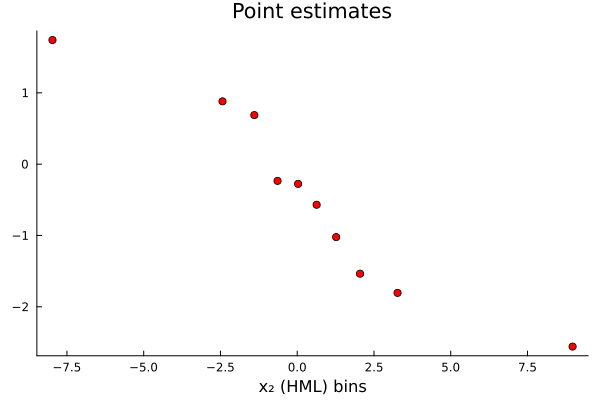

In [8]:
p1 = scatter(LUmid,β,
             title = "Point estimates",
             xlabel = "x₂ (HML) bins",
             markercolor = :red, 
             legend = false,
             grid = false)
#vline!(vcat(LU[1,1],LU[:,2]),linecolor=:black,line=(:dash,0.5))
display(p1)

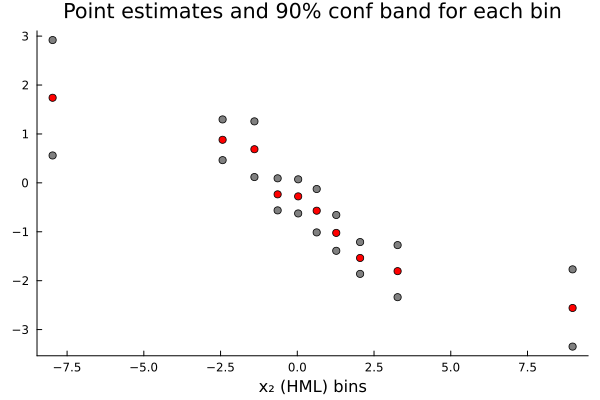

In [9]:
p1 = scatter(LUmid,β,
             title = "Point estimates and 90% conf band for each bin",
             xlabel = "x₂ (HML) bins",
             markercolor = :red,
             legend = false,
             grid = false)
scatter!(LUmid,cfB[:,1],markercolor = :grey)
scatter!(LUmid,cfB[:,2],markercolor = :grey)
#vline!(vcat(LU[1,1],LU[:,2]),linecolor=:black,line=(:dash,0.5))
display(p1)